In [1]:
# Loading libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("Clean_Dataset.csv")

In [3]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [6]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [7]:
# Create column price in euros for more intuitive interpretation:
df["euro_price"] = (df["price"] / 90.94).astype(int)

In [8]:
df.rename(columns={"price": "rupee_price"}, inplace=True)

In [9]:
# Drop unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
# Other cleaning thoughts: make duration an int column with rounded values as categories so that there are less unique values (for other regression type)

In [11]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,rupee_price,euro_price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,65
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,65
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,65
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,65
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,65
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,761
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,847
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,869
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,897


In [12]:
df.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
rupee_price         12157
euro_price           1076
dtype: int64

### Transforming categorical to continuous columns for use in KNN

In [14]:
# Transformations 1: airline, source_city + destination_city, departure_time + arrival_time = one-hot encoding / creating dummies
df_num = pd.get_dummies(df, columns = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time'], drop_first = True)
df_num
# drop first drops one of the created dummy instances which is obsolete, thus reducing it to 31 instead of 36 columns in total!

,flight,stops,class,duration,days_left,rupee_price,euro_price,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,SG-8709,zero,Economy,2.17,1,5953,65,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,SG-8157,zero,Economy,2.33,1,5953,65,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,I5-764,zero,Economy,2.17,1,5956,65,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,UK-995,zero,Economy,2.25,1,5955,65,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,UK-963,zero,Economy,2.33,1,5955,65,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,UK-822,one,Business,10.08,49,69265,761,False,False,False,...,False,False,False,True,False,False,True,False,False,False
300149,UK-826,one,Business,10.42,49,77105,847,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300150,UK-832,one,Business,13.83,49,79099,869,False,False,False,...,True,False,False,False,False,False,False,False,False,True
300151,UK-828,one,Business,10.00,49,81585,897,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [15]:
# Transformation 2: class change 0/1
df_num["class"].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [16]:
df_num["class"].unique()

array(['Economy', 'Business'], dtype=object)

In [18]:
df_num["class"] = df_num["class"].apply(lambda x: 1 if x == "Business" else 0)
df_num["class"].value_counts()

class
0    206666
1     93487
Name: count, dtype: int64

In [19]:
# Transformation 3: stops - change to just 0,1,2 
df_num["stops"].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [22]:
df_num["stops"].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [31]:
df_num["stops"] = df_num["stops"].apply(lambda x: 0 if x == "zero" else 1 if x == "one" else 2)
df_num["stops"].value_counts()

stops
1    250863
0     36004
2     13286
Name: count, dtype: int64

In [38]:
df_num.info() # ask Rami why int32 category and if thats problematic!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   flight                        300153 non-null  object 
 1   stops                         300153 non-null  int64  
 2   class                         300153 non-null  int64  
 3   duration                      300153 non-null  float64
 4   days_left                     300153 non-null  int64  
 5   rupee_price                   300153 non-null  int64  
 6   euro_price                    300153 non-null  int32  
 7   airline_Air_India             300153 non-null  bool   
 8   airline_GO_FIRST              300153 non-null  bool   
 9   airline_Indigo                300153 non-null  bool   
 10  airline_SpiceJet              300153 non-null  bool   
 11  airline_Vistara               300153 non-null  bool   
 12  source_city_Chennai           300153 non-nul

In [41]:
# Dropping remaining columns I do not need before split
df_split = df_num.drop('flight',axis=1) ### possibly add later for other regression methods!
df_split = df_split.drop('rupee_price',axis=1)

In [44]:
df_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   stops                         300153 non-null  int64  
 1   class                         300153 non-null  int64  
 2   duration                      300153 non-null  float64
 3   days_left                     300153 non-null  int64  
 4   euro_price                    300153 non-null  int32  
 5   airline_Air_India             300153 non-null  bool   
 6   airline_GO_FIRST              300153 non-null  bool   
 7   airline_Indigo                300153 non-null  bool   
 8   airline_SpiceJet              300153 non-null  bool   
 9   airline_Vistara               300153 non-null  bool   
 10  source_city_Chennai           300153 non-null  bool   
 11  source_city_Delhi             300153 non-null  bool   
 12  source_city_Hyderabad         300153 non-nul

In [46]:
# Perform train test split
features = df_split.drop(columns = ["euro_price"]) # dropping target column to keep evreything else!
target = df_split["euro_price"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [50]:
knn = KNeighborsRegressor(n_neighbors=5)

In [52]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [54]:
knn.score(X_test, y_test)
# Model fit without normalization: 0.7616402112051759

0.7616402112051759

In [56]:
# Now Model with NORMALIZATION
normalizer = MinMaxScaler()

In [58]:
normalizer.fit(X_train)

MinMaxScaler()

In [60]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [61]:
# KNN regressor with NORMALIZED values 
knn = KNeighborsRegressor(n_neighbors=5)

In [64]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor()

In [65]:
knn.score(X_test_norm, y_test)
# With normalization = 0.9712787443365872 = improvement of 21%! BEST MODEL SO FAR = KNN WITH NORMALIZED VALUES 

0.9712787443365872

In [67]:
# Now same procedure but with STANDARDIZATION instead 
scaler = StandardScaler()

In [68]:
scaler.fit(X_train)

StandardScaler()

In [69]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [70]:
# KNN regressor with STANDARDIZED values 
knn = KNeighborsRegressor(n_neighbors=5)

In [71]:
knn.fit(X_train_std, y_train)

KNeighborsRegressor()

In [72]:
knn.score(X_test_std, y_test)
# With normalization = 0.9698714265262293 = improvement of 20%! But normalization is still best option 

0.9698714265262293

### Feature Selection

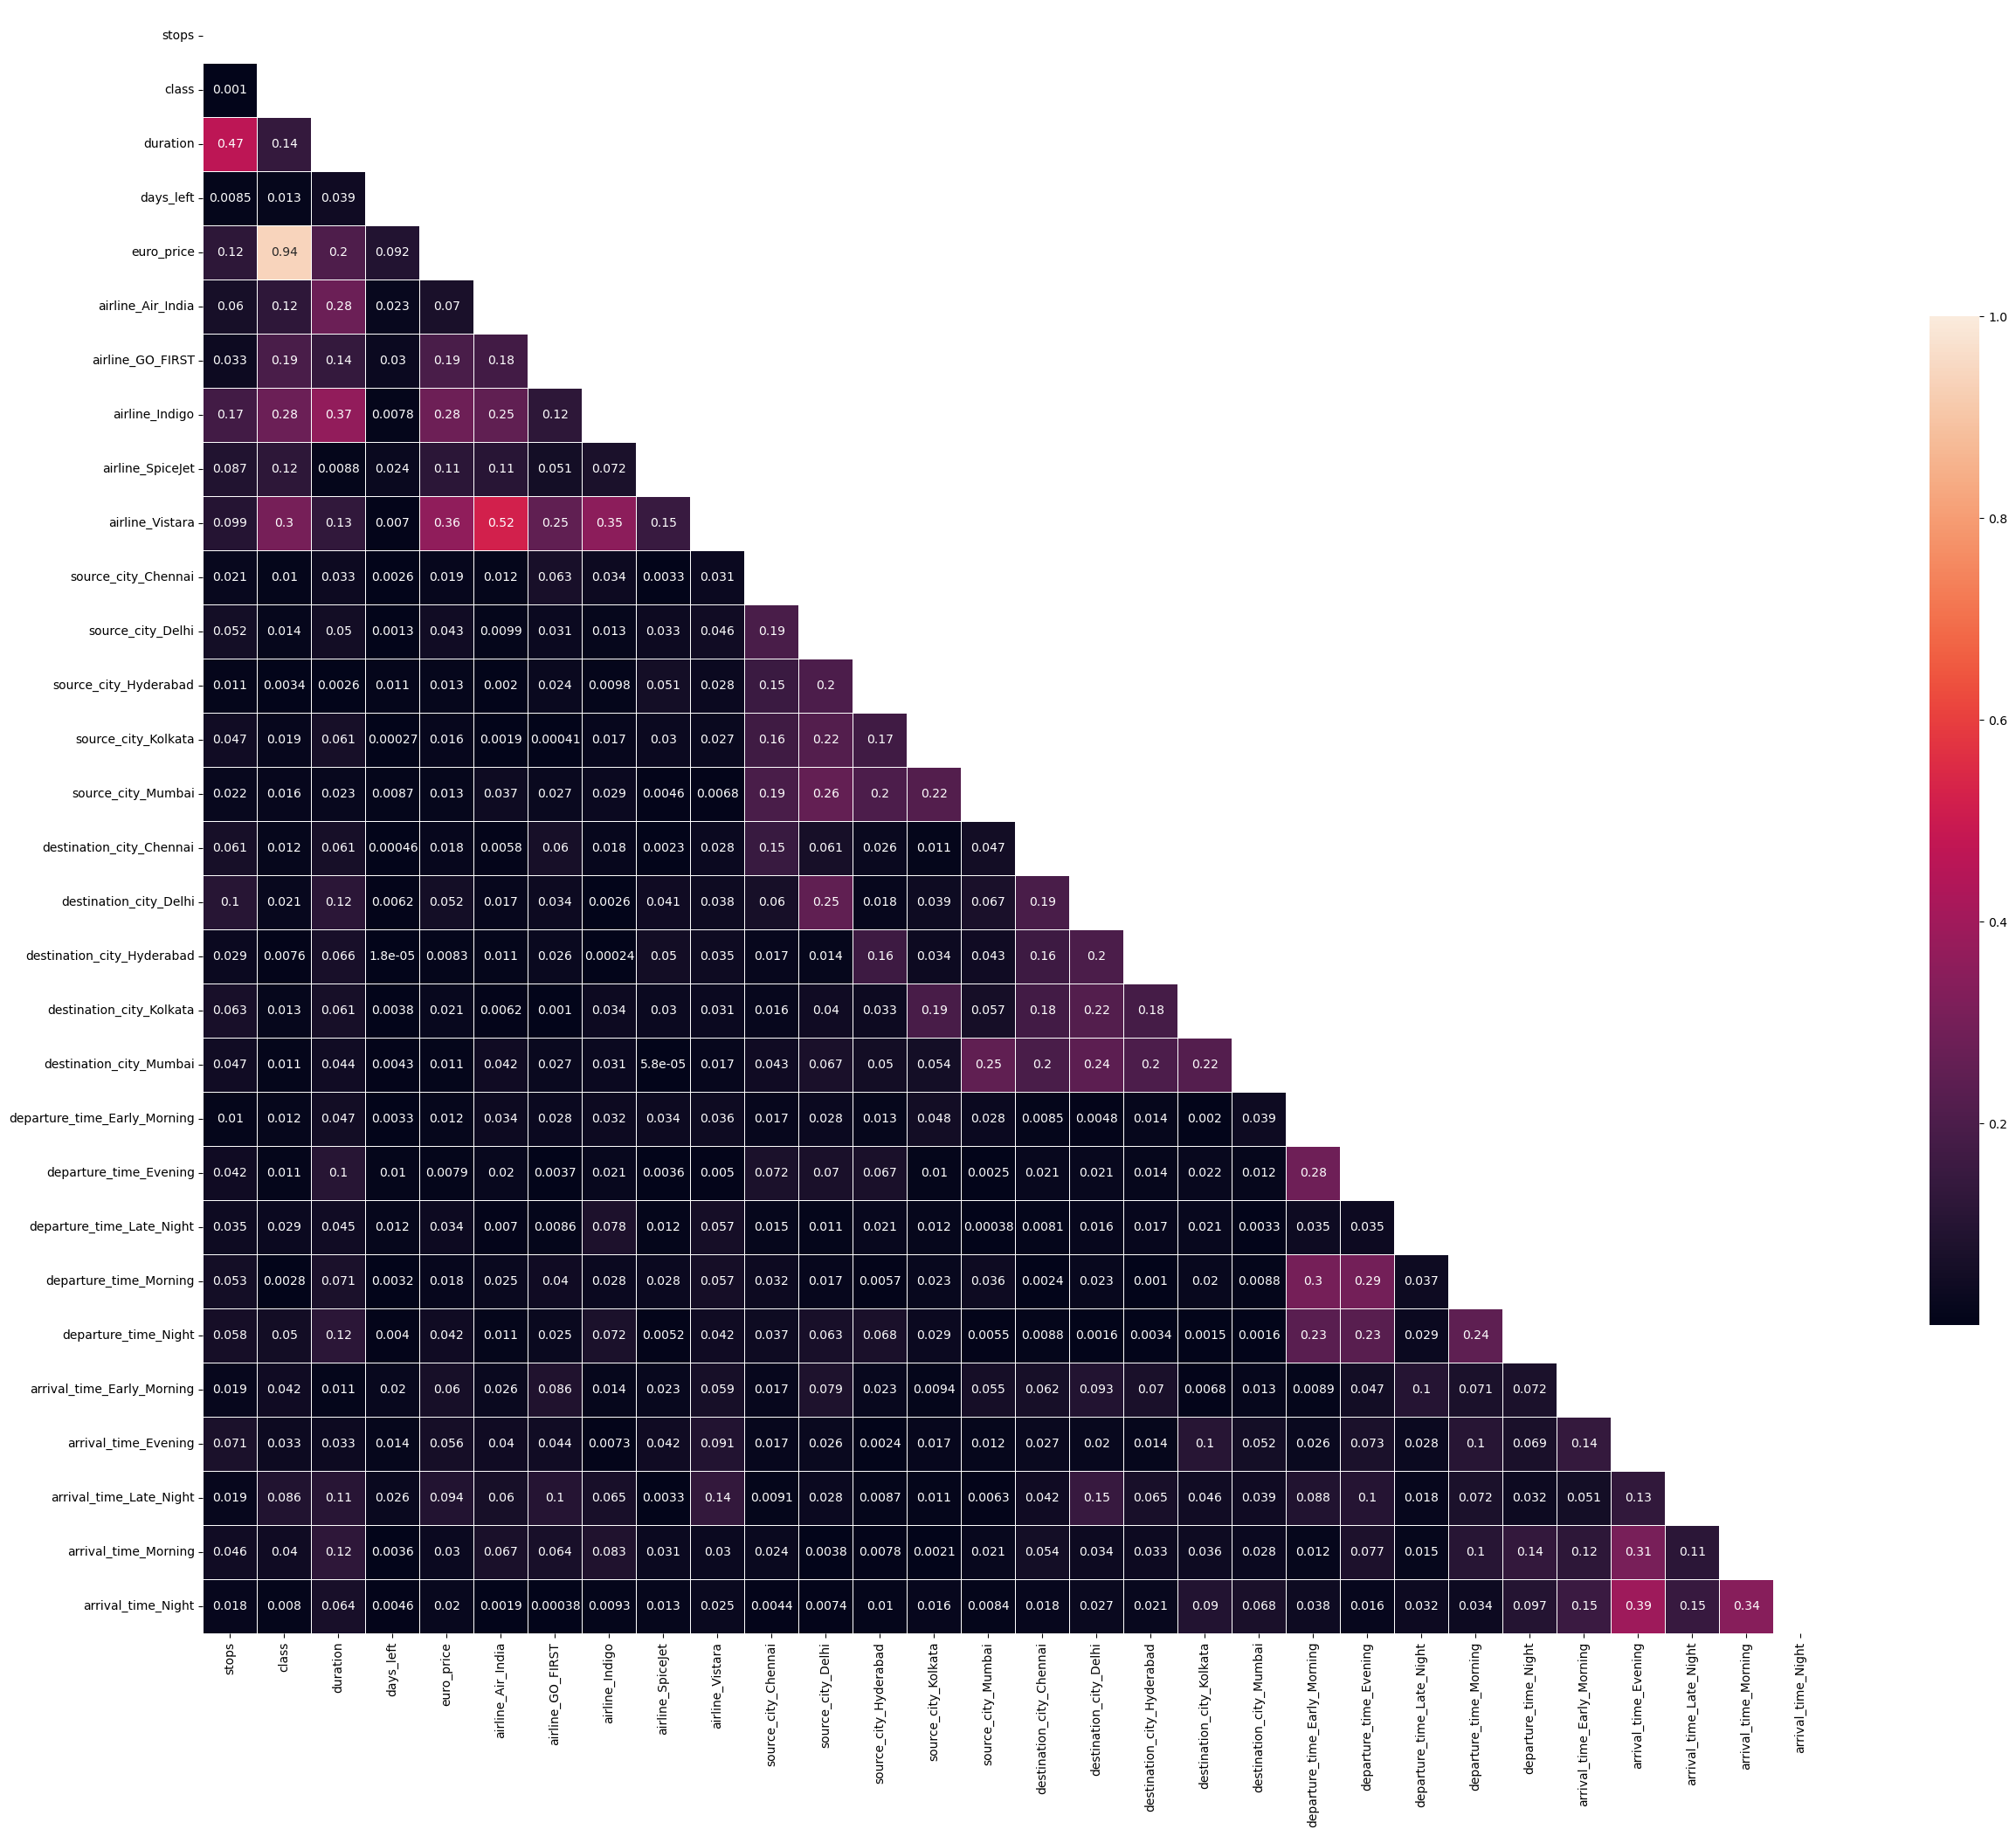

In [74]:
corr=np.abs(df_split.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

# feature selection only makes sense for "real" numercial variables: stops, class, duration, days_left

### Performing Linear Regression

In [76]:
# LINEAR REGRESSION with same transformed/ continuous data (as used for KNN)
# Creating instance of LINEAR REGRESSION model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [77]:
pred_lin_basic = lin_reg.predict(X_test)

print("MAE", mean_absolute_error(pred_lin_basic, y_test))
print("RMSE", mean_squared_error(pred_lin_basic, y_test, squared=False))
print("R2 score", lin_reg.score(X_test, y_test))
# R2 score 0.9105762603572624 is much better than before with basic KNN (0.7616402112051759)

MAE 49.3977597899125
RMSE 74.35316262390852
R2 score 0.9105762603572624


C:\Users\merkm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [78]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 32 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   flight                        300153 non-null  object 
 1   stops                         300153 non-null  int64  
 2   class                         300153 non-null  int64  
 3   duration                      300153 non-null  float64
 4   days_left                     300153 non-null  int64  
 5   rupee_price                   300153 non-null  int64  
 6   euro_price                    300153 non-null  int32  
 7   airline_Air_India             300153 non-null  bool   
 8   airline_GO_FIRST              300153 non-null  bool   
 9   airline_Indigo                300153 non-null  bool   
 10  airline_SpiceJet              300153 non-null  bool   
 11  airline_Vistara               300153 non-null  bool   
 12  source_city_Chennai           300153 non-nul

In [86]:
# Displaying coefficients
lin_reg_coef = {feature : coef for feature, coef in zip(X_train.columns, lin_reg.coef_)}
lin_reg_coef
# Stops: with every additional stop, the flight price rises by 123€ - 61€
# Class: Business price tickets are on average 497€ more expensive than economy class tickets 
# days_left: With every additional day that is left before the flight, the price decreases by on average 68€. 
# Which makes sense because ticket prices are cheaper when you book in advance and increase teh closer you get to the departure date 

{'stops': 61.65021724582056,
 'class': 496.55423619518274,
 'duration': 0.9330182790220828,
 'days_left': -1.417777374221132,
 'airline_Air_India': 2.5810478414778077,
 'airline_GO_FIRST': 23.789623777319328,
 'airline_Indigo': 26.830066628424095,
 'airline_SpiceJet': 26.473660302424513,
 'airline_Vistara': 46.70723971241661,
 'source_city_Chennai': -0.9101165543583488,
 'source_city_Delhi': -16.07373370088692,
 'source_city_Hyderabad': -17.919505145145205,
 'source_city_Kolkata': 16.852779555578007,
 'source_city_Mumbai': -2.047778750850015,
 'destination_city_Chennai': -3.197323800761306,
 'destination_city_Delhi': -16.44244562208299,
 'destination_city_Hyderabad': -18.829970202049747,
 'destination_city_Kolkata': 14.858603333506933,
 'destination_city_Mumbai': 0.9142382526275973,
 'departure_time_Early_Morning': 8.692230055897914,
 'departure_time_Evening': 7.1568679439808465,
 'departure_time_Late_Night': 16.922232291162704,
 'departure_time_Morning': 9.738327699097988,
 'departure

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'stops'),
  Text(1, 0, 'class'),
  Text(2, 0, 'duration'),
  Text(3, 0, 'days_left'),
  Text(4, 0, 'airline_Air_India'),
  Text(5, 0, 'airline_GO_FIRST'),
  Text(6, 0, 'airline_Indigo'),
  Text(7, 0, 'airline_SpiceJet'),
  Text(8, 0, 'airline_Vistara'),
  Text(9, 0, 'source_city_Chennai'),
  Text(10, 0, 'source_city_Delhi'),
  Text(11, 0, 'source_city_Hyderabad'),
  Text(12, 0, 'source_city_Kolkata'),
  Text(13, 0, 'source_city_Mumbai'),
  Text(14, 0, 'destination_city_Chennai'),
  Text(15, 0, 'destination_city_Delhi'),
  Text(16, 0, 'destination_city_Hyderabad'),
  Text(17, 0, 'destination_city_Kolkata'),
  Text(18, 0, 'destination_city_Mumbai'),
  Text(19, 0, 'departure_time_Early_Morning'),
  Text(20, 0, 'departure_time_Evening'),
  Text(21, 0, 'departure_time_Late_Night'),
  Text(22, 0, 'departure_time_Morn

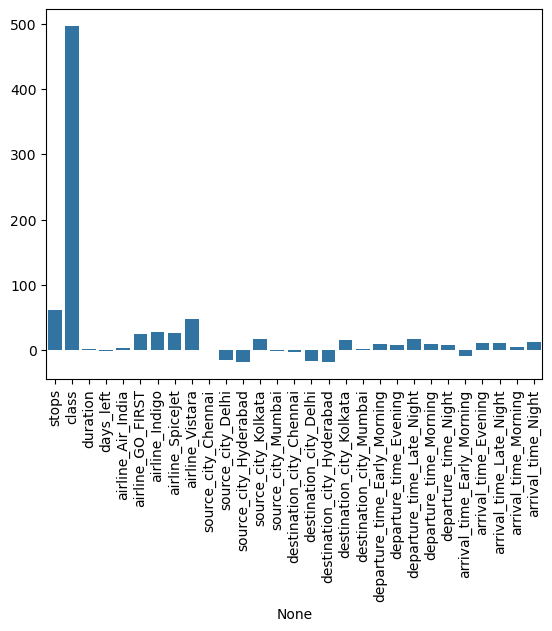

In [93]:
# Visualising LinReg results with barplot
sns.barplot(x=X_train.columns, y=lin_reg_coef.values()) # Rami fixed it to be displayed with values 
plt.xticks(rotation=90)

In [99]:
# Now Linreg with normalization (normalised varaibles taken from KNN part) 
lin_reg = LinearRegression()
lin_reg.fit(X_train_norm, y_train)

LinearRegression()

In [105]:
pred_lin_norm = lin_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred_lin_norm, y_test))
print("RMSE", mean_squared_error(pred_lin_norm, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_norm, y_test))
# same R2 score 0.9105762603572624 value as basic version 

MAE 49.39775978991266
RMSE 74.35316262390853
R2 score 0.9105762603572624


C:\Users\merkm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Decison Tree

In [108]:
# Initialize 
tree = DecisionTreeRegressor(max_depth=3)

In [110]:
# Fit
tree.fit(X_train, y_train) # never use normalized/standardized values for decision tree

DecisionTreeRegressor(max_depth=3)

In [114]:
pred = tree.predict(X_test)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test, y_test))
# R2 score 0.9360089738791941 is highest one so far!!!
# MAE - means that my prediction is on average 38 dollars off from results 
# RMSE - ? 

MAE 38.089248251575846
RMSE 62.897382036034145
R2 score 0.9360089738791941


C:\Users\merkm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [116]:
df_num

,flight,stops,class,duration,days_left,rupee_price,euro_price,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,SG-8709,0,0,2.17,1,5953,65,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,SG-8157,0,0,2.33,1,5953,65,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,I5-764,0,0,2.17,1,5956,65,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,UK-995,0,0,2.25,1,5955,65,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,UK-963,0,0,2.33,1,5955,65,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,UK-822,1,1,10.08,49,69265,761,False,False,False,...,False,False,False,True,False,False,True,False,False,False
300149,UK-826,1,1,10.42,49,77105,847,False,False,False,...,False,False,False,False,False,False,False,False,False,True
300150,UK-832,1,1,13.83,49,79099,869,False,False,False,...,True,False,False,False,False,False,False,False,False,True
300151,UK-828,1,1,10.00,49,81585,897,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [118]:
tree_importance = {feature : importance for feature, importance in zip(X_train.columns, tree.feature_importances_)}
tree_importance
# 3 main important one´s: class explains 94% of the target variable price . Which makes sense, because my class variable has two values: economy and business 
# and it makes sense that the difference between business and economy explains most of the variation
# Duration explains 4% of the flight price variation
# days left explains around 1% of the flight price variation

{'stops': 0.0,
 'class': 0.9412547796697925,
 'duration': 0.04145095033494892,
 'days_left': 0.00812240509808975,
 'airline_Air_India': 0.0,
 'airline_GO_FIRST': 0.0,
 'airline_Indigo': 0.0,
 'airline_SpiceJet': 0.0,
 'airline_Vistara': 0.009171864897168714,
 'source_city_Chennai': 0.0,
 'source_city_Delhi': 0.0,
 'source_city_Hyderabad': 0.0,
 'source_city_Kolkata': 0.0,
 'source_city_Mumbai': 0.0,
 'destination_city_Chennai': 0.0,
 'destination_city_Delhi': 0.0,
 'destination_city_Hyderabad': 0.0,
 'destination_city_Kolkata': 0.0,
 'destination_city_Mumbai': 0.0,
 'departure_time_Early_Morning': 0.0,
 'departure_time_Evening': 0.0,
 'departure_time_Late_Night': 0.0,
 'departure_time_Morning': 0.0,
 'departure_time_Night': 0.0,
 'arrival_time_Early_Morning': 0.0,
 'arrival_time_Evening': 0.0,
 'arrival_time_Late_Night': 0.0,
 'arrival_time_Morning': 0.0,
 'arrival_time_Night': 0.0}

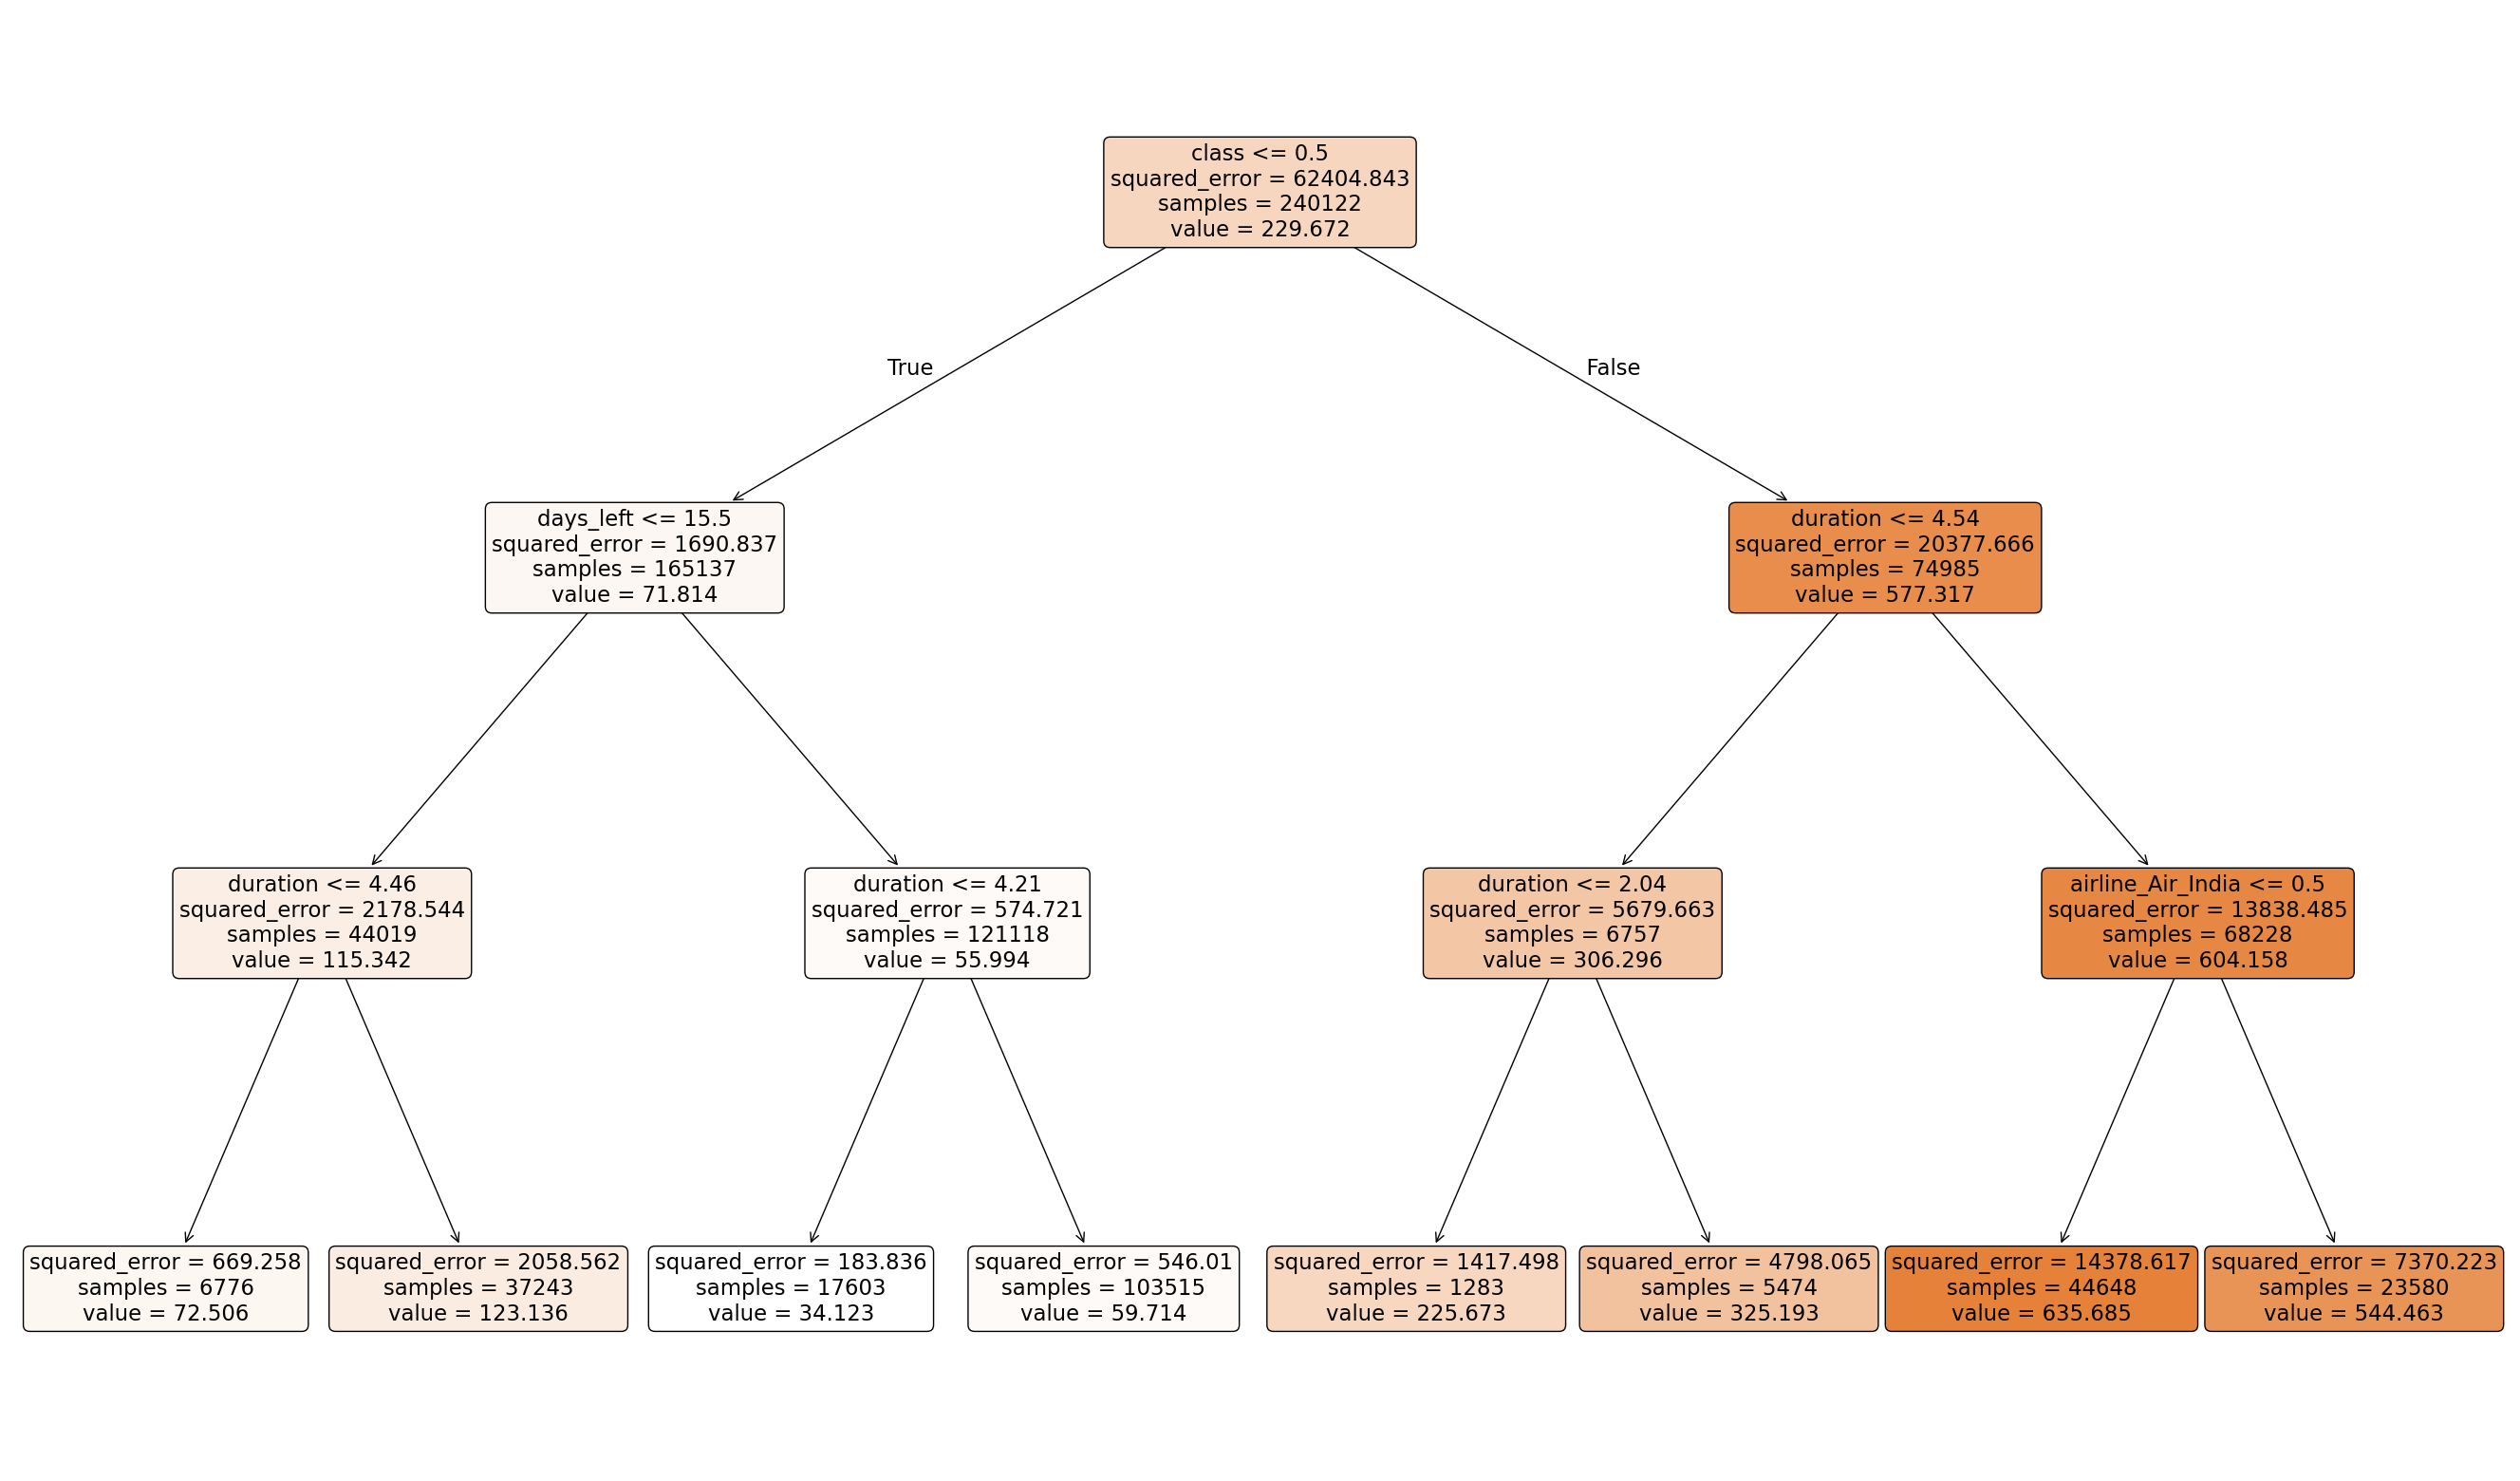

In [337]:
# Visualising tree 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))
plot_tree(tree,filled = True, rounded=True,feature_names=list(X_train.columns))
plt.show()

### Different Method : Linear Regression with Categorical Variables using formula based approach 

In [417]:
# Displaying original df with categorical columns
df_cat = df # renaming it df_cat for later usage

In [419]:
# Renaming class because class is a reserved keyword in Python, which causes a syntax error when used in a formula (OLS regression below)
df_cat = df_cat.rename(columns={'class': 'flight_class'})
df_cat

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,rupee_price,euro_price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,65
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,65
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,65
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,65
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,65
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,761
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,847
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,869
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,897


In [422]:
import statsmodels.formula.api as smf

model = smf.ols("euro_price ~ C(airline) + C(source_city) + C(departure_time) + C(stops) + C(arrival_time) + C(destination_city) + C(flight_class) + duration + days_left", 
                data=df_cat).fit()

print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:             euro_price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.029e+05
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:14:38   Log-Likelihood:            -1.7189e+06
No. Observations:              300153   AIC:                         3.438e+06
Df Residuals:                  300122   BIC:                         3.438e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

### Ensemble Methods

In [342]:
# Thursday Tasks: We dont have to fine-tune our model using techniques like Grid Search and Cross-Validation anymore!
# However, in presentation, talk about metrics like R2 in depth etc. + integrate ensemble methods that we had today! (Random Forest, AB, GB)

In [367]:
# 1. Random Forest - Initialize
forest = RandomForestRegressor(n_estimators=100, 
                             max_depth=10)

In [369]:
# Train
forest.fit(X_train_norm, y_train)

RandomForestRegressor(max_depth=10)

In [370]:
#Evaluate
pred = forest.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", forest.score(X_test_norm, y_test))
# R2 score 0.9639009838949292 means an improvement of +3% in comparison to normal decision tree

MAE 26.353860567904047
RMSE 47.24117757841327


C:\Users\merkm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 score 0.9639009838949292


In [379]:
# 2. AdaBoost - Initialize
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [381]:
# Train
ada_reg.fit(X_train, y_train) 

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [382]:
# Evaluate
pred = ada_reg.predict(X_test)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test, y_test))
# R2 score 0.9800205158536873 means an improvement of +5% in comparison to normal decision tree - best model so far!

MAE 20.16315107255845
RMSE 35.145131091893774


C:\Users\merkm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 score 0.9800205158536873


In [385]:
# 3. Gradient Boost - Initialize
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

In [387]:
# Train 
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=20)

In [388]:
# Evaluation
pred = gb_reg.predict(X_test)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_reg.score(X_test, y_test))
# R2 score 0.9827836906455457 -> nearly same, but slightly higher than AdaBoost - best flight price model 

MAE 12.224311850532494
RMSE 32.624439645282344


C:\Users\merkm\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R2 score 0.9827836906455457
